In [272]:
import nltk
import pandas as pd
import numpy as np

import re
from functools import reduce
import openpyxl
import xlsxwriter

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from scipy.stats import pearsonr
from sklearn.impute import SimpleImputer

import os
import importlib
import utilities
%matplotlib inline
from scipy.stats import pearsonr
import numpy as np
import seaborn as sns
import ast

In [273]:
importlib.reload(utilities)

<module 'utilities' from '/Users/yyu/PycharmProjects/AUT-Scoring/scripts/utilities.py'>

# load 

In [274]:
splist=['cbow_6_ukwac_subtitle','cbow_subtitle','glove_6B','TASA','ukwac']
sourceFolder ='/Users/yyu/Box Sync/ORG-SCHOOL-WCAS-PSYCHOLOGY-BEEMAN-LAB/COAT/scoring/SemDisData/rawdata/'
resultFolder ='/Users/yyu/Box Sync/ORG-SCHOOL-WCAS-PSYCHOLOGY-BEEMAN-LAB/COAT/scoring/SemDisData/algos/'

### 1: 'cbow_6_ukwac_subtitle'
### 2: 'cbow_subtitle'
### 3: 'glove_6B'
### 4: 'TASA'

## Legend
### min: novelty measure between response and stim, semantic distance with "minimun similarity word"
### disp: dispersion of response set from same subject 
### orig: originality of a response based on freqency of occuring from all subjects
### volume: minimum volume of enclosing ellipsoid of the response set
### fluency: number of responses from a subject

## item code
### b_: box, r_: rope, br_:brick

In [59]:
splist

['cbow_6_ukwac_subtitle', 'cbow_subtitle', 'glove_6B', 'TASA']

In [3]:
def renameLabel(label):
    ret=label
    for i in range(len(splist)):
        ret=ret.replace(splist[i],str(i+1))
    return ret
print([renameLabel(l) for l in splist])
    

['1', '2', '3', '4']


In [275]:
sdSpace=['cbowu','cbows','cboww','tasa','glov']


In [4]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [5]:
def getPC(df,cols):
    ndata=(df[cols]-df[cols].mean())/df[cols].std()
    imp_mean.fit(ndata.values)
    pca = PCA(n_components=1)

    imputed=imp_mean.transform(ndata.values)
    pca.fit(imputed)
    pc1=(pca.fit_transform(imputed).T)[0]
  
    return (pc1-np.mean(pc1))/np.std(pc1)


# BRM Study 1

In [276]:
studytag='s1'
#file = studytag+'_data_long.xlsx'
#agg=pd.read_excel(sourceFolder+file,sheet_name=studytag+'_data_long')
file = studytag+'_yy_long.csv'
df=pd.read_csv(resultFolder+file)
df['study']=1
df.columns

Index(['id', 'item', 'response', 'rater1', 'rater2', 'rater3', 'rater4',
       'cbowu_m', 'cbows_m', 'cboww_m', 'tasa_m', 'glov_m', 'cbowu_a',
       'cbows_a', 'cboww_a', 'tasa_a', 'glov_a', 'response_processed', 'rater',
       'wad_cbowu', 'ewm_cbowu', 'mad_cbowu', 'wad_cbows', 'ewm_cbows',
       'mad_cbows', 'wad_glov', 'ewm_glov', 'mad_glov', 'wad_tasa', 'ewm_tasa',
       'mad_tasa', 'wad_cboww', 'ewm_cboww', 'mad_cboww', 'study'],
      dtype='object')

In [277]:
df['SemDis_MEAN']=df[[s+'_m' for s in sdSpace]].mean(axis=1)
df['ewm_MEAN']=df[['ewm_'+s for s in sdSpace]].mean(axis=1)
df['mad_MEAN']=df[['mad_'+s for s in sdSpace]].mean(axis=1)
df['wad_MEAN']=df[['wad_'+s for s in sdSpace]].mean(axis=1)

In [278]:
df.rename(columns=dict([(s+'_m','SemDis_'+s) for s in sdSpace]),inplace=True)

In [279]:
allcols=['SemDis_MEAN','ewm_MEAN','mad_MEAN','wad_MEAN','wordcnt','rater']
allcols=['SemDis_MEAN','ewm_MEAN','mad_MEAN','wad_MEAN','wordcnt','rater','id','item','response','response_processed','study']

In [280]:
df['wordcnt']=df.apply(lambda r: len(ast.literal_eval(r['response_processed'])),axis=1)
df['wordcnt'].describe()

count    2918.000000
mean        1.703907
std         1.087873
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: wordcnt, dtype: float64

In [281]:
studytag='s2'
#file = studytag+'_data_long.xlsx'
#agg=pd.read_excel(sourceFolder+file,sheet_name=studytag+'_data_long')
file = studytag+'_yy_long.csv'
df2=pd.read_csv(resultFolder+file)
df2['study']=2
df2.columns

Index(['id', 'item', 'response', 'cbowu', 'cbows', 'cboww', 'tasa', 'glov',
       'rater1', 'rater2', 'rater3', 'self', 'rater', 'response_processed',
       'wad_cbowu', 'ewm_cbowu', 'mad_cbowu', 'wad_cbows', 'ewm_cbows',
       'mad_cbows', 'wad_glov', 'ewm_glov', 'mad_glov', 'wad_tasa', 'ewm_tasa',
       'mad_tasa', 'wad_cboww', 'ewm_cboww', 'mad_cboww', 'study'],
      dtype='object')

In [282]:
df2['SemDis_MEAN']=df2[[s for s in sdSpace]].mean(axis=1)
df2['ewm_MEAN']=df2[['ewm_'+s for s in sdSpace]].mean(axis=1)
df2['mad_MEAN']=df2[['mad_'+s for s in sdSpace]].mean(axis=1)
df2['wad_MEAN']=df2[['wad_'+s for s in sdSpace]].mean(axis=1)
df2['wordcnt']=df2.apply(lambda r: len(ast.literal_eval(r['response_processed'])),axis=1)
df2['wordcnt'].describe()

count    2372.000000
mean        1.944351
std         1.527846
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        20.000000
Name: wordcnt, dtype: float64

In [283]:
df2.rename(columns=dict([(s,'SemDis_'+s) for s in sdSpace]),inplace=True)

In [284]:
studytag='s3'
#file = studytag+'_data_long.xlsx'
#agg=pd.read_excel(sourceFolder+file,sheet_name=studytag+'_data_long')
file = studytag+'_yy_long.csv'
df3=pd.read_csv(resultFolder+file)
df3['study']=3
df3.columns

Index(['id', 'item', 'response', 'time', 'br_rater1', 'br_rater2', 'br_rater3',
       'br_mean', 'cbowu', 'cbows', 'cboww', 'tasa', 'glov',
       'response_processed', 'rater', 'wad_cbowu', 'ewm_cbowu', 'mad_cbowu',
       'wad_cbows', 'ewm_cbows', 'mad_cbows', 'wad_glov', 'ewm_glov',
       'mad_glov', 'wad_tasa', 'ewm_tasa', 'mad_tasa', 'wad_cboww',
       'ewm_cboww', 'mad_cboww', 'study'],
      dtype='object')

In [285]:
df3['SemDis_MEAN']=df3[[s for s in sdSpace]].mean(axis=1)
df3['ewm_MEAN']=df3[['ewm_'+s for s in sdSpace]].mean(axis=1)
df3['mad_MEAN']=df3[['mad_'+s for s in sdSpace]].mean(axis=1)
df3['wad_MEAN']=df3[['wad_'+s for s in sdSpace]].mean(axis=1)
df3['wordcnt']=df3.apply(lambda r: len(ast.literal_eval(r['response_processed'])),axis=1)
df3['wordcnt'].describe()

count    1807.000000
mean        2.461538
std         1.778903
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        17.000000
Name: wordcnt, dtype: float64

In [286]:
df3.rename(columns=dict([(s,'SemDis_'+s) for s in sdSpace]),inplace=True)

In [287]:
dfAll=pd.concat([df[allcols],df2[allcols],df3[allcols]])

In [271]:
tmp=pd.concat([df[allcols],df2[allcols],df3[allcols]])
#tmp=tmp.groupby(['id','study','item']).max()
tmp=tmp.groupby(['id','study','item']).mean()
tmp=tmp.groupby(level=[0,1]).mean()
#tmp.to_csv(resultFolder+'BRM_agg_maxmean.csv')
tmp.to_csv(resultFolder+'BRM_agg_meanmean.csv')

In [289]:
'a b  c'.split()

['a', 'b', 'c']

In [291]:
dfAll['wordcntall']=dfAll.apply(lambda r: len(r['response'].split()),axis=1)
dfAll[['wordcntall','wordcnt']].describe()

,wordcntall,wordcnt
count,7097.000000,7097.000000
mean,3.738199,1.977173
std,4.153576,1.470602
min,1.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,5.000000,2.000000
max,50.000000,20.000000


In [292]:
(len(dfAll[dfAll['wordcntall']<2]),len(dfAll[dfAll['wordcntall']<3]),len(dfAll[dfAll['wordcnt']<2]),len(dfAll))

(2473, 4054, 3360, 7097)

In [293]:
utilities.printNiceCorrTable(dfAll,['wordcnt','wordcntall'],['rater'])

,rater
wordcnt,0.42***
wordcntall,0.37***


In [294]:
utilities.printNiceCorrTable(dfAll,['wordcnt','wordcntall'],['SemDis_MEAN','ewm_MEAN','mad_MEAN','wad_MEAN'])

,SemDis_MEAN,ewm_MEAN,mad_MEAN,wad_MEAN
wordcnt,0.38***,0.43***,0.49***,0.3***
wordcntall,0.34***,0.32***,0.41***,0.25***


In [84]:
for col in ['SemDis_MEAN','ewm_MEAN','mad_MEAN','wad_MEAN']:
    print(utilities.testCorrDiff(dfAll,'wordcnt','rater',col))

(2.782041658819181, 0.005416085669780468)
(-1.0492788833184732, 0.2940855770790838)
(-5.5782616297284715, 2.5189814456538784e-08)
(8.947872947067506, 0.0)


In [295]:
for col in ['SemDis_MEAN','ewm_MEAN','mad_MEAN','wad_MEAN']:
    print(utilities.testCorrDiff(dfAll,'wordcntall','rater',col))

(1.9901086209407703, 0.046617300163367625)
(3.3907035448043468, 0.0007009445155541361)
(-2.8929312310287862, 0.0038282804653428926)
(8.675714307255948, 0.0)


In [85]:
utilities.printTriNiceCorrTable(dfAll,['SemDis_MEAN','ewm_MEAN','mad_MEAN','wad_MEAN','rater'])

,SemDis_MEAN,ewm_MEAN,mad_MEAN,wad_MEAN
ewm_MEAN,0.81***,,,
mad_MEAN,0.68***,0.81***,,
wad_MEAN,0.61***,0.73***,0.95***,
rater,0.26***,0.3***,0.36***,0.3***


In [99]:
utilities.testCorrDiff(dfAll,'rater','ewm_MEAN','SemDis_MEAN')

(3.1819740580194784, 0.0014690673307224955)

In [100]:
utilities.testCorrDiff(dfAll,'rater','ewm_MEAN','mad_MEAN')

(-4.763462841297103, 1.9408553899591396e-06)

In [101]:
utilities.testCorrDiff(dfAll,'rater','ewm_MEAN','wad_MEAN')

(0.5643914489564359, 0.5725056258466745)

In [102]:
utilities.testCorrDiff(dfAll,'rater','mad_MEAN','wad_MEAN')

(5.458244731090917, 4.971503453354842e-08)

(15.0, 0.0)

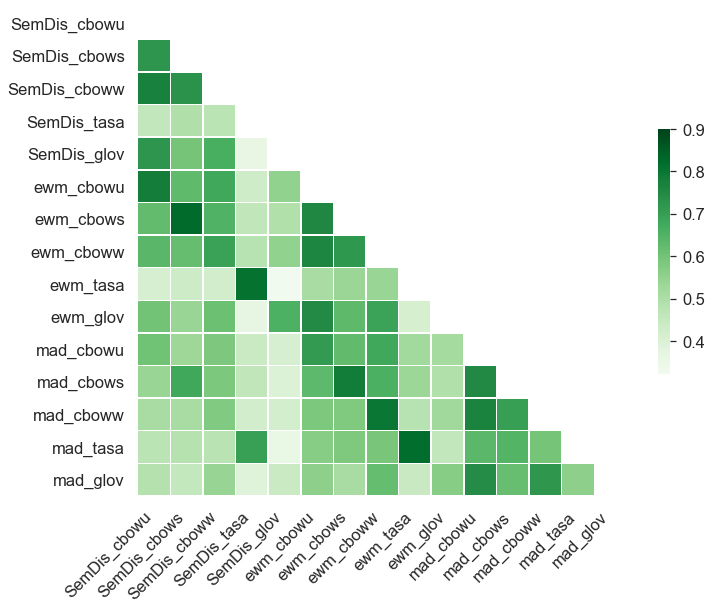

In [98]:

sdCols=['SemDis_'+s for s in sdSpace]
ewmCols = ['ewm_'+s for s in sdSpace]
madCols = ['mad_'+s for s in sdSpace]
wadCols = ['wad_'+s for s in sdSpace]


sns.set(font_scale=1.5) 
sns.set_style("whitegrid")
corrdf=pd.concat([df[sdCols+ewmCols+madCols],df2[sdCols+ewmCols+madCols],df3[sdCols+ewmCols+madCols]]).corr()

#corrdf=df[ewmCols+madCols+wadCols].corr()
mask = np.triu(np.ones_like(corrdf, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 304, s=80,sep=20,center='light',as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrdf, mask=mask, cmap='Greens',center=.6,vmax=.9,
            square=True, linewidths=.5,cbar_kws={"shrink": .5})
plt.xticks(rotation=45,horizontalalignment='right')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

In [296]:
print(len(dfAll[dfAll['wordcntall']<2]),len(dfAll))
pd.DataFrame({'mean':dfAll[dfAll['wordcntall']<2][allcols].mean(),
              'se':dfAll[dfAll['wordcntall']<2][allcols].std()/np.sqrt(len(dfAll[dfAll['wordcntall']<2]))})

2473 7097


,mean,se
SemDis_MEAN,0.831974,0.001848
ewm_MEAN,0.823751,0.002012
mad_MEAN,0.823517,0.002005
wad_MEAN,0.823444,0.002004
wordcnt,1.001617,0.001143
rater,1.373671,0.008570
id,1157.855641,20.257956
study,1.602911,0.014538


In [297]:
print(len(dfAll[dfAll['wordcntall']>=2]),len(dfAll))
pd.DataFrame({'mean':dfAll[dfAll['wordcntall']>=22][allcols].mean(),
              'se':dfAll[dfAll['wordcntall']>=22][allcols].std()/np.sqrt(len(dfAll[dfAll['wordcntall']>=22]))})

4624 7097


,mean,se
SemDis_MEAN,0.984864,0.006146
ewm_MEAN,0.999302,0.005899
mad_MEAN,1.009909,0.005232
wad_MEAN,0.919830,0.005062
wordcnt,9.792453,0.458241
rater,2.464132,0.108257
id,341.849057,94.667190
study,2.301887,0.095565


In [176]:
print(len(dfAll[dfAll['wordcnt']<2]),len(dfAll))
pd.DataFrame({'mean':dfAll[dfAll['wordcnt']<2][allcols].mean(),
              'se':dfAll[dfAll['wordcnt']<2][allcols].std()/np.sqrt(len(dfAll[dfAll['wordcnt']<2]))})

3360 7097


,mean,se
SemDis_MEAN,0.860444,0.001815
ewm_MEAN,0.826222,0.001745
mad_MEAN,0.826222,0.001745
wad_MEAN,0.826222,0.001745
wordcnt,0.997321,0.000892
rater,1.375804,0.007242


In [175]:
pd.DataFrame({'mean':dfAll[dfAll['wordcnt']>=2][allcols].mean(),
              'se':dfAll[dfAll['wordcnt']>=2][allcols].std()/np.sqrt(len(dfAll[dfAll['wordcnt']>=2]))})

,mean,se
SemDis_MEAN,0.993160,0.000830
ewm_MEAN,0.994668,0.000811
mad_MEAN,0.934169,0.001117
wad_MEAN,0.886764,0.001088
wordcnt,2.858175,0.025685
rater,1.790322,0.010981


In [171]:
utilities.printNiceCorrTable(dfAll[dfAll['wordcnt']>=2],['wordcnt'],['rater','SemDis_MEAN','ewm_MEAN','mad_MEAN','wad_MEAN'])

,rater,SemDis_MEAN,ewm_MEAN,mad_MEAN,wad_MEAN
wordcnt,0.32***,-0.07***,-0.13***,0.39***,0.21***


In [298]:
utilities.printNiceCorrTable(dfAll[dfAll['wordcntall']>=2],['wordcntall'],['rater','SemDis_MEAN','ewm_MEAN','mad_MEAN','wad_MEAN'])

,rater,SemDis_MEAN,ewm_MEAN,mad_MEAN,wad_MEAN
wordcntall,0.32***,0.03*,0.08***,0.33***,0.19***


In [199]:
utilities.printTriNiceCorrTable(dfAll[dfAll['wordcnt']>=2],['SemDis_MEAN','ewm_MEAN','mad_MEAN','wad_MEAN','rater'])

,SemDis_MEAN,ewm_MEAN,mad_MEAN,wad_MEAN
ewm_MEAN,0.44***,,,
mad_MEAN,0.01,0.03*,,
wad_MEAN,0.05***,0.09***,0.91***,
rater,-0.04**,-0.07***,0.25***,0.21***


In [299]:
utilities.printTriNiceCorrTable(dfAll[dfAll['wordcntall']>=2],['SemDis_MEAN','ewm_MEAN','mad_MEAN','wad_MEAN','rater'])

,SemDis_MEAN,ewm_MEAN,mad_MEAN,wad_MEAN
ewm_MEAN,0.48***,,,
mad_MEAN,0.26***,0.6***,,
wad_MEAN,0.24***,0.52***,0.93***,
rater,0.06***,0.17***,0.31***,0.25***


# CRJ Study

In [244]:
allcols=['SemDis_MEAN','ewm_MEAN','mad_MEAN','wad_MEAN','wordcnt','rater']

In [252]:
#file = studytag+'_data_long.xlsx'
#agg=pd.read_excel(sourceFolder+file,sheet_name=studytag+'_data_long')
file = 'CRJ_study1_yy_long.csv'
df=pd.read_csv(resultFolder+file,index_col=None)
df.columns

Index(['Unnamed: 0', 'id', 'rater1', 'rater2', 'rater3', 'rater4', 'response',
       'response_nofill', 'item', 'item_nofill', 'SemDis_cbowu',
       'SemDis_cbows', 'SemDis_cboww', 'SemDis_tasa', 'SemDis_glov',
       'SemDis_MEAN', 'SemDis_factor', 'response_processed', 'wad_cbowu',
       'ewm_cbowu', 'mad_cbowu', 'wad_cbows', 'ewm_cbows', 'mad_cbows',
       'wad_glov', 'ewm_glov', 'mad_glov', 'wad_tasa', 'ewm_tasa', 'mad_tasa',
       'wad_cboww', 'ewm_cboww', 'mad_cboww', 'rater'],
      dtype='object')

In [253]:
df[['SemDis_'+s for s in sdSpace]]=df[['SemDis_'+s for s in sdSpace]].applymap(lambda r:float(str(r).replace(',','.')))

In [254]:
df['SemDis_MEAN']=df[['SemDis_'+s for s in sdSpace]].mean(axis=1)
df['ewm_MEAN']=df[['ewm_'+s for s in sdSpace]].mean(axis=1)
df['mad_MEAN']=df[['mad_'+s for s in sdSpace]].mean(axis=1)
df['wad_MEAN']=df[['wad_'+s for s in sdSpace]].mean(axis=1)
df['study']=1

In [255]:
df['wordcnt']=df.apply(lambda r: len(ast.literal_eval(r['response_processed'])),axis=1)
df['wordcnt'].describe()

count    1015.000000
mean        1.496552
std         0.692121
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: wordcnt, dtype: float64

In [256]:
#file = studytag+'_data_long.xlsx'
#agg=pd.read_excel(sourceFolder+file,sheet_name=studytag+'_data_long')
file = 'CRJ_study2_yy_long.csv'
df2=pd.read_csv(resultFolder+file,index_col=None)
df2['study']=2
df2.columns

Index(['Unnamed: 0', 'id', 'response', 'response_nofill', 'item',
       'item_nofill', 'SemDis_cbowu', 'SemDis_cbows', 'SemDis_cboww',
       'SemDis_tasa', 'SemDis_glov', 'SemDis_MEAN', 'SemDis_factor',
       'response_processed', 'wad_cbowu', 'ewm_cbowu', 'mad_cbowu',
       'wad_cbows', 'ewm_cbows', 'mad_cbows', 'wad_glov', 'ewm_glov',
       'mad_glov', 'wad_tasa', 'ewm_tasa', 'mad_tasa', 'wad_cboww',
       'ewm_cboww', 'mad_cboww', 'study'],
      dtype='object')

In [257]:
cols=['SemDis_MEAN','ewm_MEAN','mad_MEAN','wad_MEAN','wordcnt','id','study','item']
df2['wordcnt']=df2.apply(lambda r: len(ast.literal_eval(r['response_processed'])),axis=1)
df2['ewm_MEAN']=df2[['ewm_'+s for s in sdSpace]].mean(axis=1)
df2['mad_MEAN']=df2[['mad_'+s for s in sdSpace]].mean(axis=1)
df2['wad_MEAN']=df2[['wad_'+s for s in sdSpace]].mean(axis=1)

tmp=pd.concat([df[cols+['rater']],df2[cols]])
tmp=tmp.groupby(['id','study','item']).mean()
tmp.head()
#tmp=tmp.groupby(['id','study','item']).max()
#tmp=tmp.groupby(level=[0,1]).mean()
#tmp.to_csv(resultFolder+'CRJ_agg_meanmean.csv')
#tmp.to_csv(resultFolder+'CRJ_agg_maxmean.csv')

/Users/yyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


SemDis_MEAN  ewm_MEAN  mad_MEAN  rater  wad_MEAN  wordcnt
id   study item                                                             
2000 1     belt       1.017344    1.0148    0.9222   1.50    0.8956      2.0
           bucket     0.733542    0.7122    0.7122   1.25    0.7122      1.0
           clock      0.960116    0.9758    0.9030   1.75    0.8654      2.0
           knife      0.999600    0.9820    0.9332   2.25    0.8988      2.0
           lamp       0.837570    0.8286    0.8286   2.00    0.8286      1.0

In [259]:
#tmp=tmp.groupby(['id','study','item']).max()
tmp=tmp.groupby(level=[0,1]).mean()
tmp.to_csv(resultFolder+'CRJ_agg_meanmean.csv')
#tmp.to_csv(resultFolder+'CRJ_agg_maxmean.csv')

In [182]:
dfAll=df
utilities.printNiceCorrTable(dfAll,['wordcnt'],['rater'])

,rater
wordcnt,0.47***


In [141]:
utilities.printNiceCorrTable(dfAll,['wordcnt'],['SemDis_MEAN','ewm_MEAN','mad_MEAN','wad_MEAN'])

,SemDis_MEAN,ewm_MEAN,mad_MEAN,wad_MEAN
wordcnt,0.53***,0.6***,0.48***,0.28***


In [142]:
for col in ['SemDis_MEAN','ewm_MEAN','mad_MEAN','wad_MEAN']:
    print(utilities.testCorrDiff(dfAll,'wordcnt','rater',col))

(-1.9932289829176044, 0.046504511873405985)
(-4.543570463082076, 6.198881621344299e-06)
(-0.2921240756481407, 0.7702517526853252)
(5.455218724355496, 6.151987719249519e-08)


In [143]:
utilities.printTriNiceCorrTable(dfAll,['SemDis_MEAN','ewm_MEAN','mad_MEAN','wad_MEAN','rater'])

,SemDis_MEAN,ewm_MEAN,mad_MEAN,wad_MEAN
ewm_MEAN,0.84***,,,
mad_MEAN,0.71***,0.85***,,
wad_MEAN,0.61***,0.73***,0.96***,
rater,0.31***,0.37***,0.4***,0.35***


In [148]:
utilities.testCorrDiff(dfAll,'rater','mad_MEAN','SemDis_MEAN')

(2.8378146775508117, 0.0046332885436892735)

In [144]:
utilities.testCorrDiff(dfAll,'rater','ewm_MEAN','SemDis_MEAN')

(1.7641272411035798, 0.07801281909301316)

In [146]:
utilities.testCorrDiff(dfAll,'rater','mad_MEAN','ewm_MEAN')

(1.120823623945607, 0.26262937302302536)

In [145]:
utilities.testCorrDiff(dfAll,'rater','wad_MEAN','mad_MEAN')

(-1.5991273905319279, 0.11010505365460221)

(15.0, 0.0)

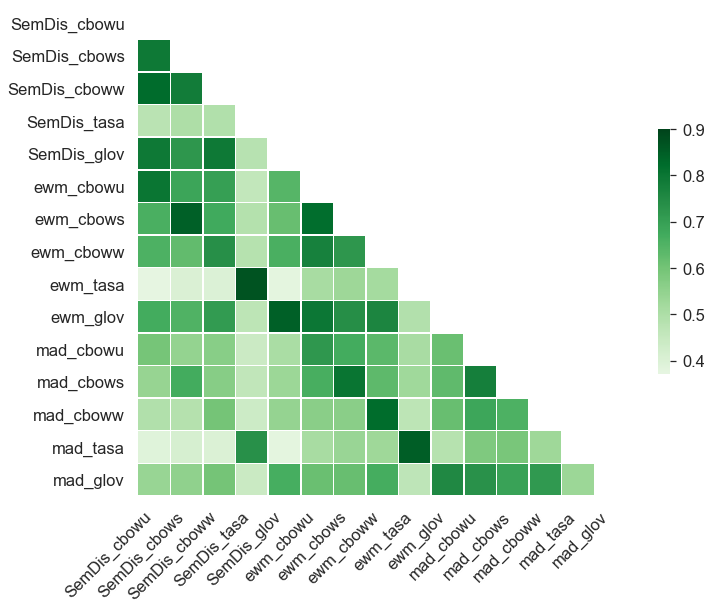

In [149]:
sdCols=['SemDis_'+s for s in sdSpace]
ewmCols = ['ewm_'+s for s in sdSpace]
madCols = ['mad_'+s for s in sdSpace]
wadCols = ['wad_'+s for s in sdSpace]


sns.set(font_scale=1.5) 
sns.set_style("whitegrid")
corrdf=dfAll[sdCols+ewmCols+madCols].corr()

#corrdf=df[ewmCols+madCols+wadCols].corr()
mask = np.triu(np.ones_like(corrdf, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 304, s=80,sep=20,center='light',as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrdf, mask=mask, cmap='Greens',center=.6,vmax=.9,
            square=True, linewidths=.5,cbar_kws={"shrink": .5})
plt.xticks(rotation=45,horizontalalignment='right')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

In [183]:
print(len(dfAll[dfAll['wordcnt']<2]),len(dfAll))
pd.DataFrame({'mean':dfAll[dfAll['wordcnt']<2][allcols].mean(),
              'se':dfAll[dfAll['wordcnt']<2][allcols].std()/np.sqrt(len(dfAll[dfAll['wordcnt']<2]))})

601 1015


,mean,se
SemDis_MEAN,0.851548,0.004281
ewm_MEAN,0.821553,0.003947
mad_MEAN,0.821553,0.003947
wad_MEAN,0.821553,0.003947
wordcnt,0.996672,0.002351
rater,1.601082,0.020568


In [185]:
utilities.printNiceCorrTable(dfAll[dfAll['wordcnt']>=2],['wordcnt'],['rater','SemDis_MEAN','ewm_MEAN','mad_MEAN','wad_MEAN'])

,rater,SemDis_MEAN,ewm_MEAN,mad_MEAN,wad_MEAN
wordcnt,0.36***,-0.24***,-0.37***,0.26***,0.15***


In [186]:
utilities.printTriNiceCorrTable(dfAll[dfAll['wordcnt']>=2],['SemDis_MEAN','ewm_MEAN','mad_MEAN','wad_MEAN','rater'])

,SemDis_MEAN,ewm_MEAN,mad_MEAN,wad_MEAN
ewm_MEAN,0.64***,,,
mad_MEAN,-0.02,-0.01,,
wad_MEAN,-0.02,-0.01,0.91***,
rater,-0.06,-0.19***,0.27***,0.29***


# Coat

In [17]:
studytag='s1'
file ='/Users/yyu/Box Sync/ORG-SCHOOL-WCAS-PSYCHOLOGY-BEEMAN-LAB/COAT/scoring/SemDisData/algos/COAT_novelty_long_wad.csv'
agg=pd.read_csv(file,index_col=None)
agg.columns

Index(['Unnamed: 0', 'id', 'novelty_1', 'novelty_2', 'response',
       'response_nofill', 'item', 'item_nofill', 'SemDis_cbowu',
       'SemDis_cbows', 'SemDis_cboww', 'SemDis_tasa', 'SemDis_glov',
       'SemDis_MEAN', 'SemDis_factor', 'rater', 'response_processed',
       'ewm_cbowu', 'mad_cbowu', 'ewm_cbows', 'mad_cbows', 'ewm_glov',
       'mad_glov', 'ewm_tasa', 'mad_tasa', 'ewm_cboww', 'mad_cboww',
       'ewm_MEAN', 'mad_MEAN', 'wad_cbowu', 'wad_cbows', 'wad_glov',
       'wad_tasa', 'wad_cboww', 'wad_MEAN'],
      dtype='object')

In [19]:
agg['wordcnt']=agg.apply(lambda r: len(ast.literal_eval(r['response_processed'])),axis=1)
agg['wordcnt'].describe()

count    3403.000000
mean        1.601528
std         0.782614
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: wordcnt, dtype: float64

In [20]:
utilities.printNiceCorrTable(agg,['wordcnt'],['rater'])

,rater
wordcnt,0.18***


In [21]:
utilities.printNiceCorrTable(agg,['wordcnt'],['SemDis_MEAN','ewm_MEAN','mad_MEAN','wad_MEAN'])

,SemDis_MEAN,ewm_MEAN,mad_MEAN,wad_MEAN
wordcnt,0.34***,0.53***,0.45***,0.3***


In [12]:
sdSpace=['cbowu','cboww','cbows','glov','tasa']

In [24]:
for col in ['SemDis_MEAN','ewm_MEAN','mad_MEAN','wad_MEAN']:
    print(utilities.testCorrDiff(agg,'wordcnt','rater',col))

(-8.281223031748727, 2.220446049250313e-16)
(-19.481325452526683, 0.0)
(-15.21813360885695, 0.0)
(-6.746564308356796, 1.773292623852285e-11)


In [26]:
for col in ['mad_MEAN','wad_MEAN']:
    print(utilities.testCorrDiff(agg,'wordcnt','ewm_MEAN',col))

(4.549257448129968, 5.5724131566847745e-06)
(13.215347695454147, 0.0)
